In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [41]:
pip install torch

In [43]:
pip install torchvision

In [47]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from keras.models import Sequential, load_model, Model
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet169, DenseNet121
from keras.applications.resnet import ResNet50

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

sns.set(style='white', context='notebook', palette='deep')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [7]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [8]:
def convert_to_ela_image(path, quality):
    filename = path
    n = 2
    name_arr = filename.split('.')
    resaved_filename = '.' + name_arr[n-1] + '.resaved.jpg'
   
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

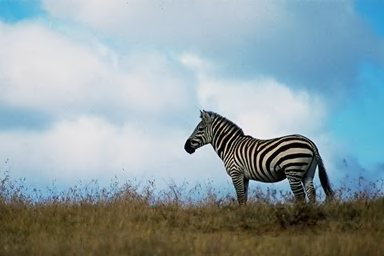

In [9]:
Image.open('./Downloads/ab.png')

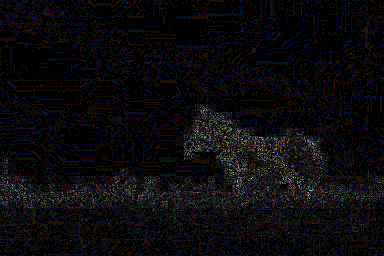

In [11]:
convert_to_ela_image("./Downloads/ab.png", 90)

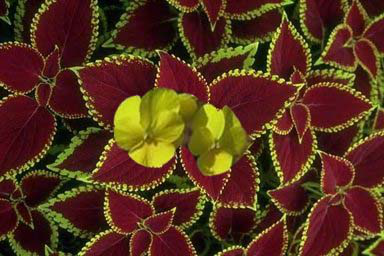

In [14]:
Image.open('./Downloads/ab3.png')

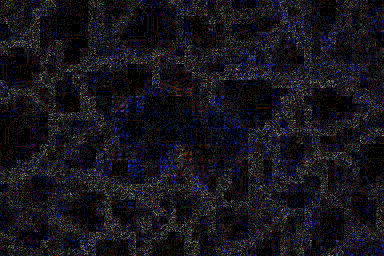

In [16]:
convert_to_ela_image('./Downloads/ab3.png', 90)

In [17]:
X = []
Y = []
for filename in os.listdir("./CASIA1/Au/"):
    X.append(array(convert_to_ela_image(os.path.join("./CASIA1/Au/", filename), 90).resize((128, 128))).flatten() / 255.0)
    Y.append(0)
    
for filename in os.listdir("./CASIA1/Sp/"):
    X.append(array(convert_to_ela_image(os.path.join("./CASIA1/Sp/", filename), 90).resize((128, 128))).flatten() / 255.0)
    Y.append(1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './CASIA1/Au/'

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 256)               29491456  
                                                        

In [20]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

C:\Users\dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
model_checkpoint = ModelCheckpoint('correct_model.h5', monitor='val_loss', save_best_only=True,verbose=1)

In [22]:
epochs = 30
batch_size = 20

In [23]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 1, callbacks=[early_stopping, model_checkpoint])

NameError: name 'X_train' is not defined

In [24]:
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [25]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [26]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [27]:
meso = Meso4()
meso.load('./Downloads/DATA_PROJECT/weights/Meso4_DF')

C:\Users\dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory('./Downloads/DATA_PROJECT/data/',target_size=(256, 256),batch_size=1,class_mode='binary')

Found 7104 images belonging to 2 classes.


In [29]:
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [30]:
!rmdir /s /q c:data\.ipynb_checkpoints

The system cannot find the path specified.


In [31]:
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory('./Downloads/DATA_PROJECT/data/',target_size=(256, 256),batch_size=1,class_mode='binary')
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 1s 840ms/step
Predicted likelihood: 0.0998
Actual label: 0
1/1 [==============================] - 0s 32ms/step

Correct prediction: True


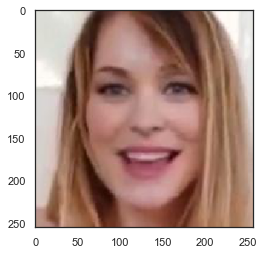

In [32]:
X, y = generator.next()


print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")


plt.imshow(np.squeeze(X));

In [33]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [34]:
for i in range(len(generator.labels)):
    
    
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
   
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 31ms/step
0  predictions completed.
1/1 [==============================] - 0s 44ms/step
1000  predictions completed.
1/1 [==============================] - 0s 44ms/step
2000  predictions completed.
1/1 [==============================] - 0s 34ms/step
3000  predictions completed.
1/1 [==============================] - 0s 39ms/step
4000  predictions completed.
1/1 [==============================] - 0s 48ms/step
5000  predictions completed.
1/1 [==============================] - 0s 46ms/step
6000  predictions completed.
1/1 [==============================] - 0s 57ms/step
7000  predictions completed.
1/1 [==============================] - 0s 49ms/step
All 7104 predictions completed


In [35]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

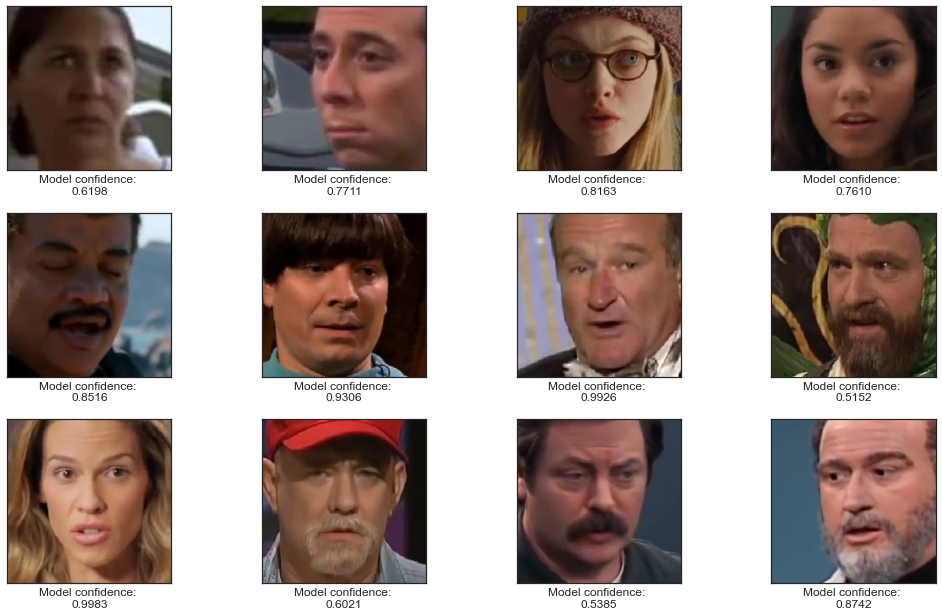

In [36]:
plotter(correct_real, correct_real_pred)

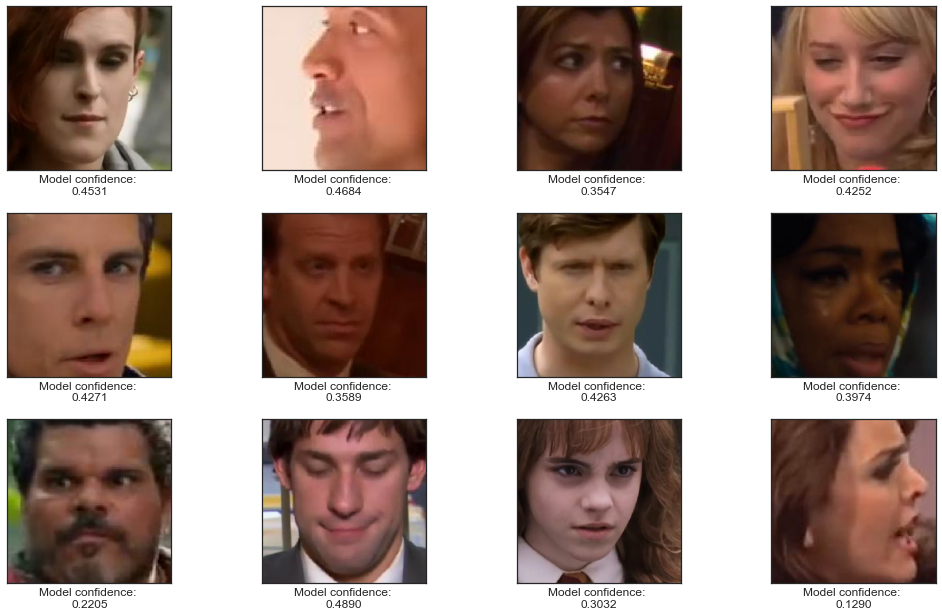

In [37]:
plotter(misclassified_real, misclassified_real_pred)

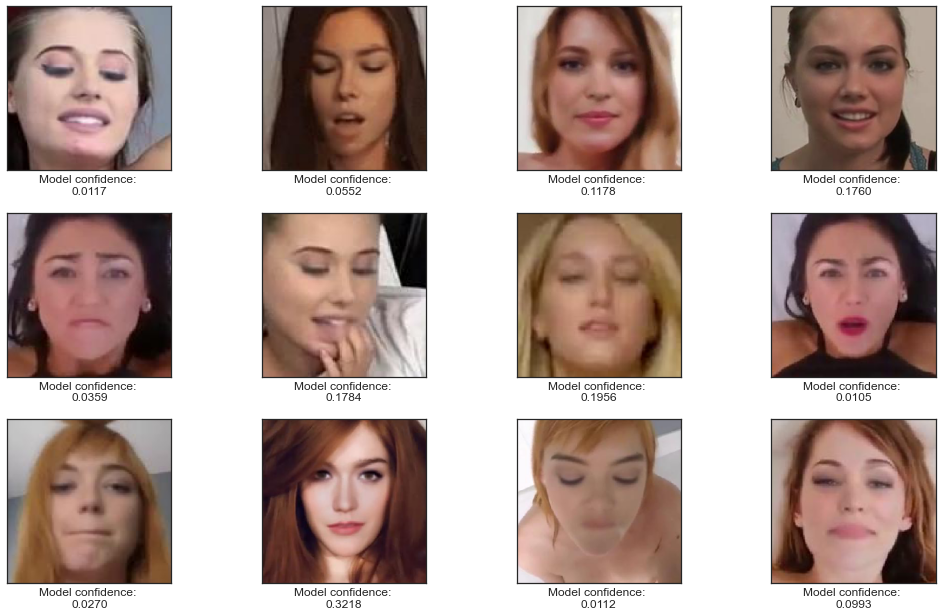

In [38]:
plotter(correct_deepfake, correct_deepfake_pred)

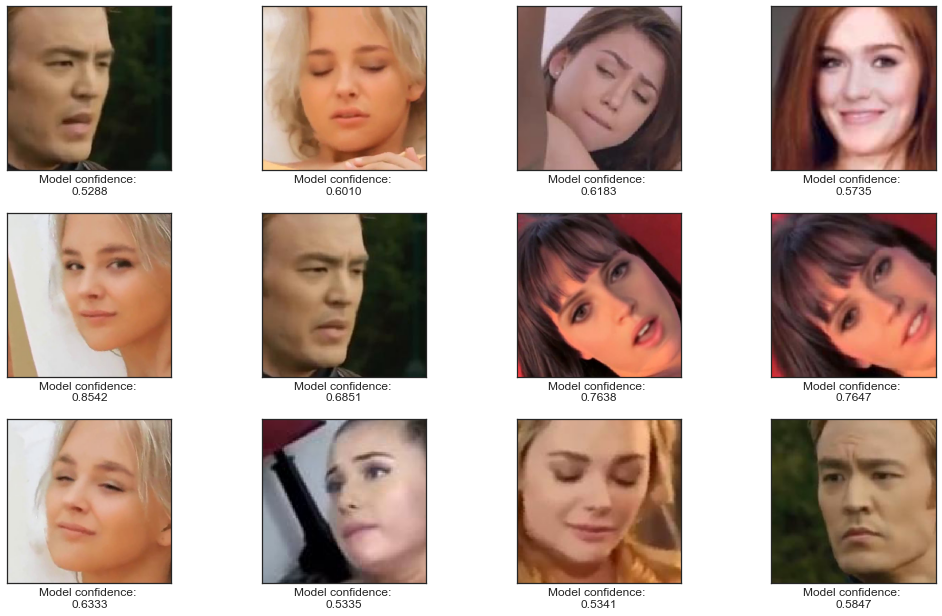

In [39]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)